In [1]:
import tensorflow as tf
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))
#set up the google colab

SystemError: GPU device not found

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Adding the path to the folder in the drive to access the file 

In [ ]:
googlepath = '/content/drive/My Drive/ADM/project'

In [2]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt # plotting
import numpy as np # linear algebra
import os # accessing directory structure
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

In [5]:
df1 = pd.read_csv('Order_dataset.csv', delimiter=',')

In [6]:
df1.head()

,Unnamed: 0,Transaction_ID,Customer_ID,Order_Date,Brand,Sneaker_Name,Sale_Price,Release_Date,Shoe_Size,Buyer_Region,Quantity,Sale_Price_per_product
0,0,1660001,1019433,2017-09-01,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,109.7,9/24/2016,11.0,California,1,109.7
1,1,1660002,1004628,2017-09-01,Off-White,Nike-Air-Max-97-Off-White,205.5,11/23/2016,11.0,California,3,68.5
2,2,1660003,1017451,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Black,69.0,11/23/2016,11.0,California,1,69.0
3,3,1660004,1007594,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,322.5,11/23/2016,11.5,Kentucky,3,107.5
4,4,1660005,1008737,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen...,331.2,2/11/2017,11.0,Rhode Island,4,82.8


In [7]:
nRow, nCol = df1.shape
print(f'There are {nRow} rows and {nCol} columns')

There are 99956 rows and 12 columns


In [8]:
df1.head()

,Unnamed: 0,Transaction_ID,Customer_ID,Order_Date,Brand,Sneaker_Name,Sale_Price,Release_Date,Shoe_Size,Buyer_Region,Quantity,Sale_Price_per_product
0,0,1660001,1019433,2017-09-01,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,109.7,9/24/2016,11.0,California,1,109.7
1,1,1660002,1004628,2017-09-01,Off-White,Nike-Air-Max-97-Off-White,205.5,11/23/2016,11.0,California,3,68.5
2,2,1660003,1017451,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Black,69.0,11/23/2016,11.0,California,1,69.0
3,3,1660004,1007594,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,322.5,11/23/2016,11.5,Kentucky,3,107.5
4,4,1660005,1008737,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen...,331.2,2/11/2017,11.0,Rhode Island,4,82.8


Function for ploting the required graph

In [9]:
def plotPerColumnDistribution(df, nGraphShown, nGraphPerRow):
    nunique = df.nunique()
    df = df[[col for col in df if nunique[col] > 1 and nunique[col] < 50]] # For displaying purposes, pick columns that have between 1 and 50 unique values
    nRow, nCol = df.shape
    columnNames = list(df)
    nGraphRow = (nCol + nGraphPerRow - 1) / nGraphPerRow
    plt.figure(num = None, figsize = (6 * nGraphPerRow, 8 * nGraphRow), dpi = 80, facecolor = 'w', edgecolor = 'k')
    for i in range(min(nCol, nGraphShown)):
        plt.subplot(nGraphRow, nGraphPerRow, i + 1)
        columnDf = df.iloc[:, i]
        if (not np.issubdtype(type(columnDf.iloc[0]), np.number)):
            valueCounts = columnDf.value_counts()
            valueCounts.plot.bar()
        else:
            columnDf.hist()
        plt.ylabel('counts')
        plt.xticks(rotation = 90)
        plt.title(f'{columnNames[i]} (column {i})')
    plt.tight_layout(pad = 1.0, w_pad = 1.0, h_pad = 1.0)
    plt.show()
    

Function for finding the correlation matrix for required features

In [10]:
# Correlation matrix
def plotCorrelationMatrix(df, graphWidth):
    filename = df.dataframeName
    df = df.dropna('columns') # drop columns with NaN
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    if df.shape[1] < 2:
        print(f'No correlation plots shown: The number of non-NaN or constant columns ({df.shape[1]}) is less than 2')
        return
    corr = df.corr()
    plt.figure(num=None, figsize=(graphWidth, graphWidth), dpi=80, facecolor='w', edgecolor='k')
    corrMat = plt.matshow(corr, fignum = 1)
    plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
    plt.yticks(range(len(corr.columns)), corr.columns)
    plt.gca().xaxis.tick_bottom()
    plt.colorbar(corrMat)
    plt.title(f'Correlation Matrix for {filename}', fontsize=15)
    plt.show()

Function for scatter and density plots

In [11]:
# Scatter and density plots
def plotScatterMatrix(df, plotSize, textSize):
    df = df.select_dtypes(include =[np.number]) # keep only numerical columns
    # Remove rows and columns that would lead to df being singular
    df = df.dropna('columns')
    df = df[[col for col in df if df[col].nunique() > 1]] # keep columns where there are more than 1 unique values
    columnNames = list(df)
    if len(columnNames) > 10: # reduce the number of columns for matrix inversion of kernel density plots
        columnNames = columnNames[:10]
    df = df[columnNames]
    ax = pd.plotting.scatter_matrix(df, alpha=0.75, figsize=[plotSize, plotSize], diagonal='kde')
    corrs = df.corr().values
    for i, j in zip(*plt.np.triu_indices_from(ax, k = 1)):
        ax[i, j].annotate('Corr. coef = %.3f' % corrs[i, j], (0.8, 0.2), xycoords='axes fraction', ha='center', va='center', size=textSize)
    plt.suptitle('Scatter and Density Plot')
    plt.show()


Reading the marketing data

In [12]:
missing_percentage = df1.isnull().sum() / df1.shape[0] * 100
missing_percentage

Unnamed: 0                0.0
Transaction_ID            0.0
Customer_ID               0.0
Order_Date                0.0
Brand                     0.0
Sneaker_Name              0.0
Sale_Price                0.0
Release_Date              0.0
Shoe_Size                 0.0
Buyer_Region              0.0
Quantity                  0.0
Sale_Price_per_product    0.0
dtype: float64

Let's count the quantity of each products sold in one year

In [13]:
most_common_products_sold = df1['Sneaker_Name'].value_counts().sort_values(ascending=False)
most_common_products_sold


Nike-Air-Max-90-Off-White-Desert-Ore                   12072
Nike-Zoom-Fly-Off-White-Black-Silver                   11332
Nike-Air-Max-90-Off-White                              11022
Nike-Air-Presto-Off-White-Black-2018                   10981
Nike-Air-Max-90-Off-White-Black                        10019
Nike-Air-Presto-Off-White-White-2018                    6737
Nike-Air-VaporMax-Off-White-2018                        6574
Nike-Air-VaporMax-Off-White                             6078
Air-Jordan-1-Retro-High-Off-White-University-Blue       4735
Nike-Air-VaporMax-Off-White-2018-Reflective             3184
Nike-Blazer-Mid-Off-White-All-Hallows-Eve               1435
Nike-Blazer-Mid-Off-White-Grim-Reaper                   1398
Nike-Zoom-Fly-Off-White-Pink                            1359
Nike-Air-VaporMax-Off-White-Black                       1313
Air-Jordan-1-Retro-High-Off-White-Chicago               1253
Nike-Air-Presto-Off-White                               1217
Nike-Air-Force-1-Low-Off

Here we see product with Nest® Learning Thermostat 3rd Gen-USA - Stainless Steel was bought most frequently. But was it also the product bought in highest quantity.Let's now considering the quanity too.

We know try to visualize this count using bar graph

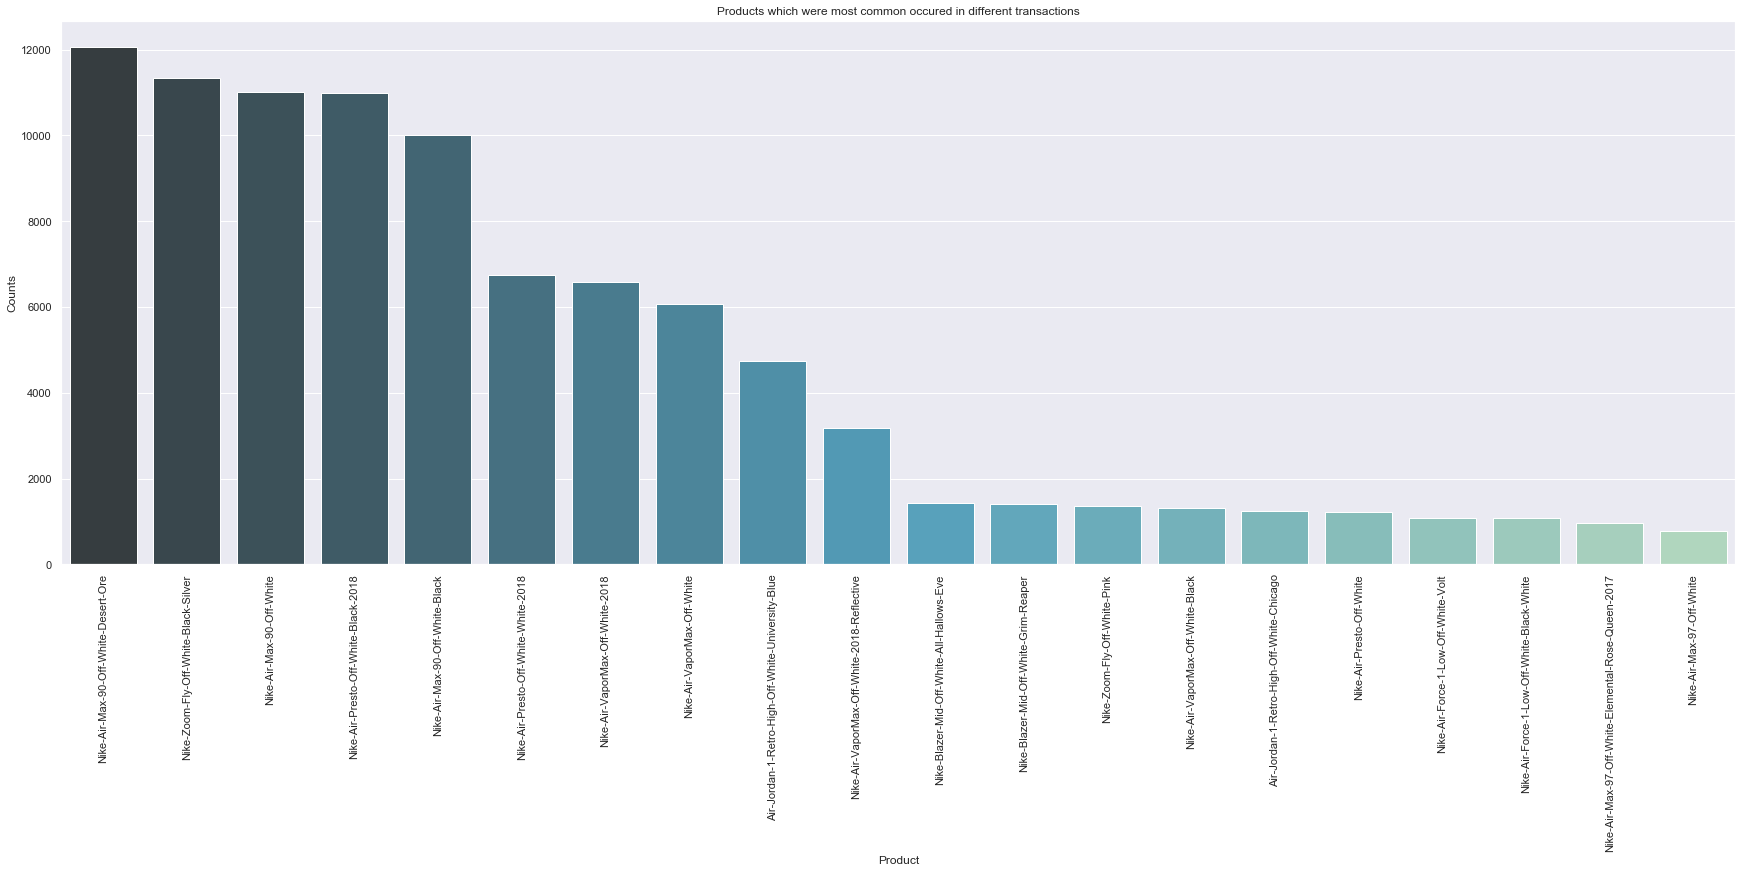

In [14]:
fig, ax = plt.subplots(1,1, figsize=(30,10))
sns.barplot(most_common_products_sold.iloc[0:20].index,
            most_common_products_sold.iloc[0:20].values,
            ax = ax, palette="GnBu_d")
ax.set_ylabel("Counts")
ax.set_xlabel("Product")
ax.set_title("Products which were most common occured in different transactions");
plt.xticks(rotation=90);

In [15]:
df1.columns

Index(['Unnamed: 0', 'Transaction_ID', 'Customer_ID', 'Order_Date', 'Brand',
       'Sneaker_Name', 'Sale_Price', 'Release_Date', 'Shoe_Size',
       'Buyer_Region ', 'Quantity', 'Sale_Price_per_product'],
      dtype='object')

In [16]:
df1['Sneaker_Name'].nunique()

32

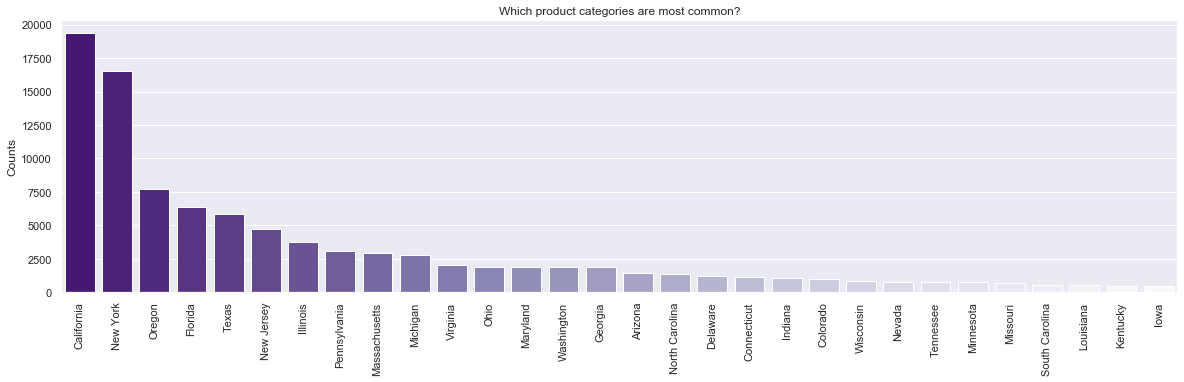

In [17]:
category_count = df1['Buyer_Region '].value_counts().sort_values(ascending=False).iloc[0:30]
plt.figure(figsize=(20,5))
sns.barplot(category_count.index, category_count.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Which product categories are most common?");
plt.xticks(rotation=90);

In [18]:
df1.groupby('Buyer_Region ')['Customer_ID'].nunique().sort_values(ascending=False).iloc[0:10]


Buyer_Region 
California       14307
New York         12735
Oregon            6786
Florida           5732
Texas             5277
New Jersey        4372
Illinois          3553
Pennsylvania      2932
Massachusetts     2750
Michigan          2644
Name: Customer_ID, dtype: int64

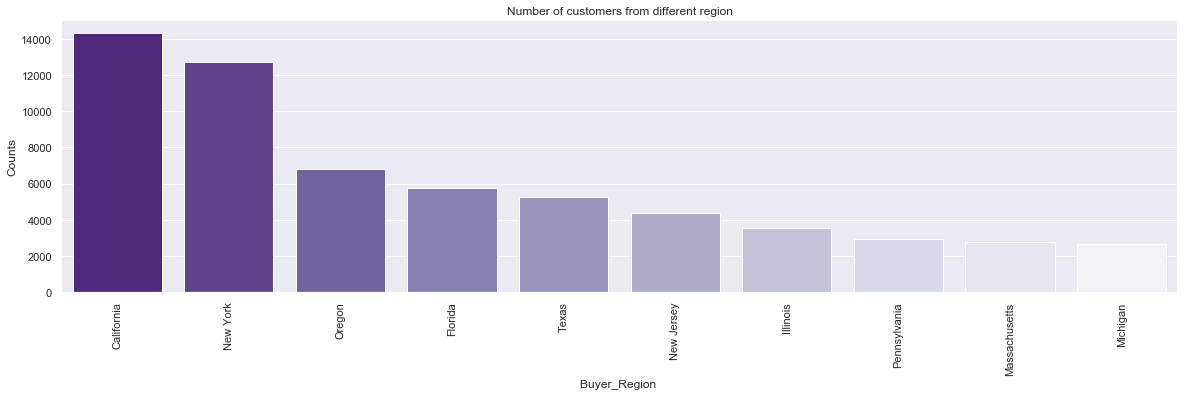

In [19]:
category_count = df1.groupby('Buyer_Region ')['Customer_ID'].nunique().sort_values(ascending=False).iloc[0:10]
plt.figure(figsize=(20,5))
sns.barplot(category_count.index, category_count.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Number of customers from different region");
plt.xticks(rotation=90);

We can see that several different products lie under same Product category . We can also observe that Apparel category has most variety of products.

Now Lets calculate the total revenue in a particular day in Online sales

In [20]:
df1.columns

Index(['Unnamed: 0', 'Transaction_ID', 'Customer_ID', 'Order_Date', 'Brand',
       'Sneaker_Name', 'Sale_Price', 'Release_Date', 'Shoe_Size',
       'Buyer_Region ', 'Quantity', 'Sale_Price_per_product'],
      dtype='object')

In [21]:
df1['Order_Date']=pd.to_datetime(df1['Order_Date'], format='%Y/%m/%d', errors='ignore')

In [22]:
df1['Order_Date']

0       2017-09-01
1       2017-09-01
2       2017-09-01
3       2017-09-01
4       2017-09-01
           ...    
99951   2019-02-13
99952   2019-02-13
99953   2019-02-13
99954   2019-02-13
99955   2019-02-13
Name: Order_Date, Length: 99956, dtype: datetime64[ns]

In [23]:
df1['Sale_Price'] = df1.Sale_Price
df1["Year"] = df1.Order_Date.dt.year
df1["Quarter"] = df1.Order_Date.dt.quarter
df1["Month"] = df1.Order_Date.dt.month
df1["Week"] = df1.Order_Date.dt.week
df1["Weekday"] = df1.Order_Date.dt.weekday
df1["Day"] = df1.Order_Date.dt.day
df1["Dayofyear"] = df1.Order_Date.dt.dayofyear
df1["Date"] = pd.to_datetime(df1[['Year', 'Month', 'Day']])

In [24]:
df1.head()


,Unnamed: 0,Transaction_ID,Customer_ID,Order_Date,Brand,Sneaker_Name,Sale_Price,Release_Date,Shoe_Size,Buyer_Region,Quantity,Sale_Price_per_product,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date
0,0,1660001,1019433,2017-09-01,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,109.7,9/24/2016,11.0,California,1,109.7,2017,3,9,35,4,1,244,2017-09-01
1,1,1660002,1004628,2017-09-01,Off-White,Nike-Air-Max-97-Off-White,205.5,11/23/2016,11.0,California,3,68.5,2017,3,9,35,4,1,244,2017-09-01
2,2,1660003,1017451,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Black,69.0,11/23/2016,11.0,California,1,69.0,2017,3,9,35,4,1,244,2017-09-01
3,3,1660004,1007594,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,322.5,11/23/2016,11.5,Kentucky,3,107.5,2017,3,9,35,4,1,244,2017-09-01
4,4,1660005,1008737,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen...,331.2,2/11/2017,11.0,Rhode Island,4,82.8,2017,3,9,35,4,1,244,2017-09-01


In [25]:
df1.columns

Index(['Unnamed: 0', 'Transaction_ID', 'Customer_ID', 'Order_Date', 'Brand',
       'Sneaker_Name', 'Sale_Price', 'Release_Date', 'Shoe_Size',
       'Buyer_Region ', 'Quantity', 'Sale_Price_per_product', 'Year',
       'Quarter', 'Month', 'Week', 'Weekday', 'Day', 'Dayofyear', 'Date'],
      dtype='object')

In [26]:
grouped_features = ["Transaction_ID","Date", "Year", "Quarter","Month", "Week", "Weekday", "Dayofyear", "Day"]

In [27]:
daily_data = pd.DataFrame(df1.groupby(grouped_features).Quantity.sum(),
                          columns=["Quantity"])
daily_data["Sale_Price"] = df1.groupby(grouped_features).Sale_Price.sum()
daily_data = daily_data.reset_index()
daily_data.head(100)

,Transaction_ID,Date,Year,Quarter,Month,Week,Weekday,Dayofyear,Day,Quantity,Sale_Price
0,1660001,2017-09-01,2017,3,9,35,4,244,1,1,109.7
1,1660002,2017-09-01,2017,3,9,35,4,244,1,3,205.5
2,1660003,2017-09-01,2017,3,9,35,4,244,1,1,69.0
3,1660004,2017-09-01,2017,3,9,35,4,244,1,3,322.5
4,1660005,2017-09-01,2017,3,9,35,4,244,1,4,331.2
...,...,...,...,...,...,...,...,...,...,...,...
95,1660096,2017-09-06,2017,3,9,36,2,249,6,6,418.2
96,1660097,2017-09-06,2017,3,9,36,2,249,6,7,591.5
97,1660098,2017-09-06,2017,3,9,36,2,249,6,4,326.0
98,1660099,2017-09-06,2017,3,9,36,2,249,6,1,65.0


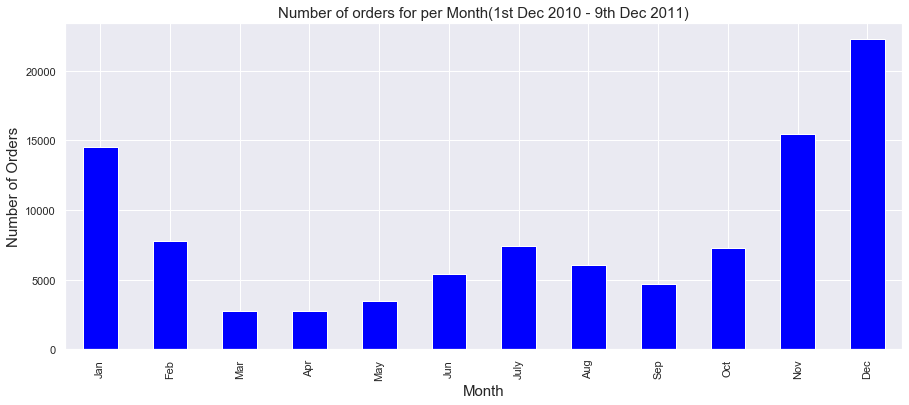

In [28]:
ax=daily_data.groupby('Transaction_ID')['Month'].unique().value_counts().sort_index().plot(kind ='bar',color='blue',figsize=(15,6))
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of orders for per Month(1st Dec 2010 - 9th Dec 2011)',fontsize=15)
ax.set_xticklabels(('Jan','Feb','Mar','Apr','May','Jun','July','Aug','Sep','Oct','Nov','Dec'));

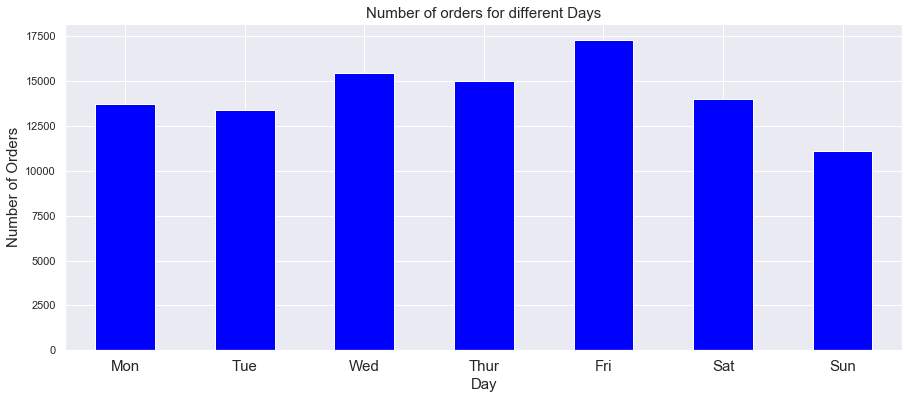

In [29]:
Day_online_sales=daily_data.groupby('Transaction_ID')['Weekday'].unique().value_counts().sort_index().plot(kind='bar',color='blue',figsize=(15,6))
Day_online_sales.set_xlabel('Day',fontsize=15)
Day_online_sales.set_ylabel('Number of Orders',fontsize=15)
Day_online_sales.set_title('Number of orders for different Days',fontsize=15)
Day_online_sales.set_xticklabels(('Mon','Tue','Wed','Thur','Fri','Sat','Sun'),rotation='horizontal',fontsize=15);

In [30]:
Day_online_sales=daily_data.groupby('Transaction_ID')['Weekday'].unique().value_counts().sort_index()
Day_online_sales = Day_online_sales.to_frame()
weekdays = ['Monday','Tuesday','Wednesday','Thursday','Friday','Saturday','Sunday']
Day_online_sales['weekdays'] = weekdays
Day_online_sales[['weekdays','Number of Orders']] = Day_online_sales[['weekdays','Weekday']] 
Day_online = Day_online_sales[['weekdays','Number of Orders']] 
Day_online.to_csv('Day_online_sales.csv')
!cp Day_online_sales.csv '/content/drive/My Drive/ADM/project'

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [31]:
Day_online

,weekdays,Number of Orders
[0],Monday,13734
[1],Tuesday,13391
[2],Wednesday,15424
[3],Thursday,14997
[4],Friday,17309
[5],Saturday,14005
[6],Sunday,11096



## **Lets start cohort analysis**

Cohort analysis in ecommerce means to monitor your customers’ behavior based on common traits they share – the first product they bought, when they became customers, etc. – to find patterns and tailor marketing activities for the group.

In [32]:
import datetime as dt
def get_month(x) : return dt.datetime(x.year,x.month,1)
df1['InvoiceMonth'] = df1['Date'].apply(get_month)
grouping = df1.groupby('Customer_ID')['InvoiceMonth']
df1['CohortMonth'] = grouping.transform('min')
df1.tail()

,Unnamed: 0,Transaction_ID,Customer_ID,Order_Date,Brand,Sneaker_Name,Sale_Price,Release_Date,Shoe_Size,Buyer_Region,...,Year,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,InvoiceMonth,CohortMonth
99951,99951,1759952,1022778,2019-02-13,Off-White,Nike-Air-VaporMax-Off-White-2018-Reflective,169.5,12/26/2018,8.0,Oregon,...,2019,1,2,7,2,13,44,2019-02-13,2019-02-01,2017-11-01
99952,99952,1759953,1028628,2019-02-13,Off-White,Nike-Air-VaporMax-Off-White-2018-Reflective,358.8,12/26/2018,8.5,California,...,2019,1,2,7,2,13,44,2019-02-13,2019-02-01,2018-12-01
99953,99953,1759954,1027094,2019-02-13,Off-White,Nike-Air-VaporMax-Off-White-2018-Reflective,302.5,12/26/2018,5.5,New York,...,2019,1,2,7,2,13,44,2019-02-13,2019-02-01,2018-04-01
99954,99954,1759955,1010450,2019-02-13,Off-White,Nike-Air-VaporMax-Off-White-2018-Reflective,585.0,12/26/2018,11.0,California,...,2019,1,2,7,2,13,44,2019-02-13,2019-02-01,2019-01-01
99955,99955,1759956,1011272,2019-02-13,Off-White,Nike-Air-VaporMax-Off-White-2018-Reflective,384.0,12/26/2018,11.5,Texas,...,2019,1,2,7,2,13,44,2019-02-13,2019-02-01,2018-01-01


In [33]:

def get_month_int (dframe,column):
    year = dframe[column].dt.year
    month = dframe[column].dt.month
    day = dframe[column].dt.day
    return year, month , day 

invoice_year,invoice_month,_ = get_month_int(df1,'InvoiceMonth')
cohort_year,cohort_month,_ = get_month_int(df1,'CohortMonth')

year_diff = invoice_year - cohort_year 
month_diff = invoice_month - cohort_month 

df1['CohortIndex'] = year_diff * 12 + month_diff + 1

In [34]:
df1.head()

,Unnamed: 0,Transaction_ID,Customer_ID,Order_Date,Brand,Sneaker_Name,Sale_Price,Release_Date,Shoe_Size,Buyer_Region,...,Quarter,Month,Week,Weekday,Day,Dayofyear,Date,InvoiceMonth,CohortMonth,CohortIndex
0,0,1660001,1019433,2017-09-01,Off-White,Air-Jordan-1-Retro-High-Off-White-Chicago,109.7,9/24/2016,11.0,California,...,3,9,35,4,1,244,2017-09-01,2017-09-01,2017-09-01,1
1,1,1660002,1004628,2017-09-01,Off-White,Nike-Air-Max-97-Off-White,205.5,11/23/2016,11.0,California,...,3,9,35,4,1,244,2017-09-01,2017-09-01,2017-09-01,1
2,2,1660003,1017451,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Black,69.0,11/23/2016,11.0,California,...,3,9,35,4,1,244,2017-09-01,2017-09-01,2017-09-01,1
3,3,1660004,1007594,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen,322.5,11/23/2016,11.5,Kentucky,...,3,9,35,4,1,244,2017-09-01,2017-09-01,2017-09-01,1
4,4,1660005,1008737,2017-09-01,Off-White,Nike-Air-Max-97-Off-White-Elemental-Rose-Queen...,331.2,2/11/2017,11.0,Rhode Island,...,3,9,35,4,1,244,2017-09-01,2017-09-01,2017-09-01,1


In [35]:
#Count monthly active customers from each cohort
grouping = df1.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Customer_ID'].apply(pd.Series.nunique)
# Return number of unique elements in the object.
cohort_data = cohort_data.reset_index()
cohort_counts = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Customer_ID')
cohort_counts

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2017-09-01,688.0,13.0,104.0,155.0,83.0,57.0,59.0,64.0,75.0,116.0,150.0,109.0,86.0,141.0,206.0,303.0,213.0,106.0
2017-10-01,585.0,76.0,133.0,67.0,46.0,44.0,44.0,75.0,87.0,123.0,100.0,65.0,112.0,182.0,218.0,171.0,97.0,NaN
2017-11-01,4116.0,891.0,482.0,308.0,364.0,372.0,472.0,695.0,888.0,726.0,516.0,817.0,1237.0,1591.0,1236.0,663.0,NaN,NaN
2017-12-01,5334.0,607.0,401.0,460.0,465.0,560.0,873.0,1206.0,940.0,643.0,1084.0,1627.0,2068.0,1569.0,862.0,NaN,NaN,NaN
2018-01-01,2224.0,182.0,194.0,192.0,233.0,386.0,480.0,424.0,288.0,449.0,641.0,906.0,682.0,373.0,NaN,NaN,NaN,NaN
2018-02-01,1341.0,138.0,115.0,145.0,209.0,271.0,225.0,159.0,256.0,424.0,537.0,395.0,205.0,NaN,NaN,NaN,NaN,NaN
2018-03-01,1375.0,107.0,123.0,243.0,296.0,262.0,183.0,284.0,393.0,549.0,415.0,215.0,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,1272.0,144.0,187.0,274.0,225.0,163.0,237.0,400.0,491.0,352.0,204.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,1440.0,249.0,335.0,266.0,202.0,292.0,440.0,569.0,429.0,266.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [36]:
cohort_counts.to_csv('cohort_counts.csv')
!cp cohort_counts.csv '/content/drive/My Drive/ADM/project'

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [37]:
cohort_size = cohort_counts.iloc[:,0]
retention = cohort_counts.divide(cohort_size,axis=0) #axis=0 to ensure the divide along the row axis 
retention.round(3) * 100 #to show the number as percentage

CohortIndex,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18
CohortMonth,,,,,,,,,,,,,,,,,,
2017-09-01,100.0,1.9,15.1,22.5,12.1,8.3,8.6,9.3,10.9,16.9,21.8,15.8,12.5,20.5,29.9,44.0,31.0,15.4
2017-10-01,100.0,13.0,22.7,11.5,7.9,7.5,7.5,12.8,14.9,21.0,17.1,11.1,19.1,31.1,37.3,29.2,16.6,NaN
2017-11-01,100.0,21.6,11.7,7.5,8.8,9.0,11.5,16.9,21.6,17.6,12.5,19.8,30.1,38.7,30.0,16.1,NaN,NaN
2017-12-01,100.0,11.4,7.5,8.6,8.7,10.5,16.4,22.6,17.6,12.1,20.3,30.5,38.8,29.4,16.2,NaN,NaN,NaN
2018-01-01,100.0,8.2,8.7,8.6,10.5,17.4,21.6,19.1,12.9,20.2,28.8,40.7,30.7,16.8,NaN,NaN,NaN,NaN
2018-02-01,100.0,10.3,8.6,10.8,15.6,20.2,16.8,11.9,19.1,31.6,40.0,29.5,15.3,NaN,NaN,NaN,NaN,NaN
2018-03-01,100.0,7.8,8.9,17.7,21.5,19.1,13.3,20.7,28.6,39.9,30.2,15.6,NaN,NaN,NaN,NaN,NaN,NaN
2018-04-01,100.0,11.3,14.7,21.5,17.7,12.8,18.6,31.4,38.6,27.7,16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2018-05-01,100.0,17.3,23.3,18.5,14.0,20.3,30.6,39.5,29.8,18.5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


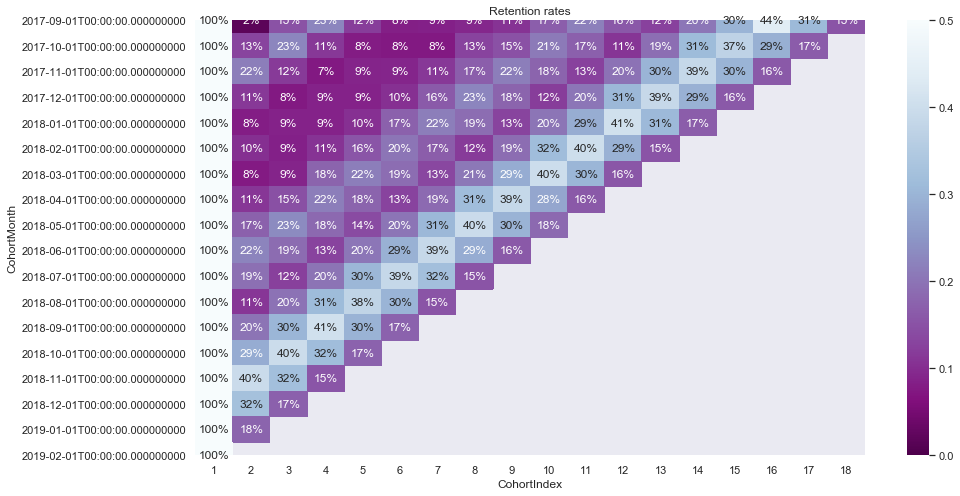

In [38]:
plt.figure(figsize=(15, 8))
plt.title('Retention rates')
sns.heatmap(data=retention,annot = True,fmt = '.0%',vmin = 0.0,vmax = 0.5,cmap="BuPu_r")
plt.show()

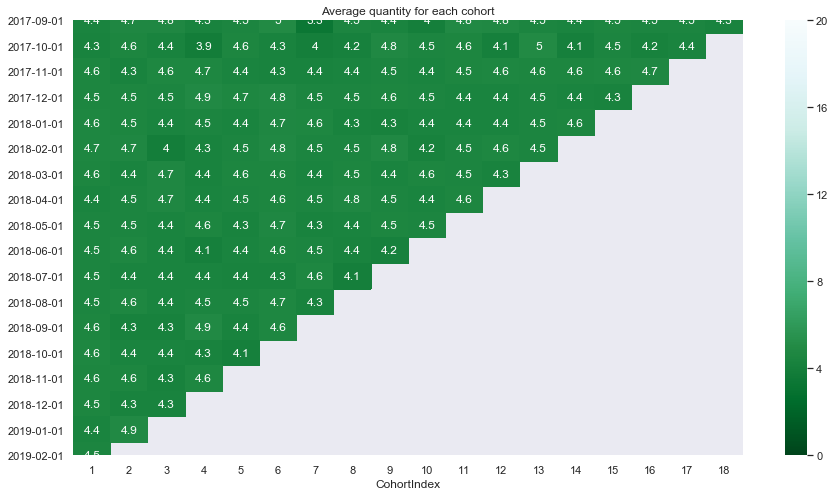

In [39]:

grouping = df1.groupby(['CohortMonth', 'CohortIndex'])
cohort_data = grouping['Quantity'].mean()
cohort_data = cohort_data.reset_index()
average_quantity = cohort_data.pivot(index='CohortMonth',columns='CohortIndex',values='Quantity')
average_quantity.round(1)
average_quantity.index = average_quantity.index.date

#Build the heatmap
plt.figure(figsize=(15, 8))
plt.title('Average quantity for each cohort')
sns.heatmap(data=average_quantity,annot = True,vmin = 0.0,vmax =20,cmap="BuGn_r")
plt.show()

**Recency, Frequency and Monetary Value calculation**

What is RFM?

RFM is an acronym of recency, frequency and monetary. Recency is about when was the last order of a customer. It means the number of days since a customer made the last purchase. If it’s a case for a website or an app, this could be interpreted as the last visit day or the last login time.
Frequency is about the number of purchase in a given period. It could be 3 months, 6 months or 1 year. So we can understand this value as for how often or how many a customer used the product of a company. The bigger the value is, the more engaged the customers are. Could we say them as our VIP? Not necessary. Cause we also have to think about how much they actually paid for each purchase, which means monetary value.
Monetary is the total amount of money a customer spent in that given period. Therefore big spenders will be differentiated with other customers such as MVP or VIP.

In [40]:
df1['Date_Age']=df1['Order_Date']

In [41]:
future_date = df1['Date'].max() + dt.timedelta(days=1)
future_date

Timestamp('2019-02-14 00:00:00')

In [42]:
rfm = df1.groupby(['Customer_ID']).agg({'Order_Date': lambda x : (future_date - x.max()).days,'Transaction_ID':'count','Sale_Price':'sum',
                                      'Date_Age': lambda x : (x.max()-x.min()).days})

In [43]:
m = rfm

In [44]:
rfm.rename(columns={'Order_Date':'Recency','Transaction_ID':'Frequency','Sale_Price':'MonetaryValue','Date_Age':'T-Age'},inplace= True)

rfm.head()

,Recency,Frequency,MonetaryValue,T-Age
Customer_ID,,,,
1000000,7,3,389.1,522
1000001,62,2,488.8,316
1000002,19,3,437.3,42
1000003,5,6,1264.5,256
1000005,90,1,100.2,0


count    29012.000000
mean         3.445333
std          1.731268
min          1.000000
25%          2.000000
50%          3.000000
75%          5.000000
max         15.000000
Name: Frequency, dtype: float64
0.0


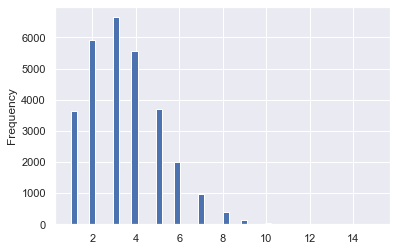

In [45]:
rfm['Frequency'].plot(kind='hist', bins=50)
print(rfm['Frequency'].describe())
print(sum(rfm['Frequency'] == 0)/float(len(rfm)))

In [46]:
Transaction_count = df1.groupby(['Customer_ID'])['Transaction_ID'].count()
Revenue_per_customer = df1.groupby(['Customer_ID'])['Sale_Price'].sum()
Transaction_count = Transaction_count.to_frame()
Revenue_per_customer = Revenue_per_customer.to_frame()
Trans_Revenue= pd.merge(Transaction_count,Revenue_per_customer , how='inner', on = 'Customer_ID')

In [47]:
Transaction_Revenue=Trans_Revenue.rename(columns={"Transaction_ID": "Transaction", "Sale_Price": "Revenue"}, errors="raise")
Transaction_Revenue

,Transaction,Revenue
Customer_ID,,
1000000,3,389.1
1000001,2,488.8
1000002,3,437.3
1000003,6,1264.5
1000005,1,100.2
...,...,...
1029995,4,577.5
1029996,4,355.2
1029997,2,533.0


In [48]:
Transaction_Revenue['avg_order_value']=Transaction_Revenue['Revenue']/Transaction_Revenue['Transaction']
Transaction_Revenue

,Transaction,Revenue,avg_order_value
Customer_ID,,,
1000000,3,389.1,129.700000
1000001,2,488.8,244.400000
1000002,3,437.3,145.766667
1000003,6,1264.5,210.750000
1000005,1,100.2,100.200000
...,...,...,...
1029995,4,577.5,144.375000
1029996,4,355.2,88.800000
1029997,2,533.0,266.500000


##**Calculate Profit** 
Margin Profit margin is the commonly used profitability ratio. It represents how much percentage of total sales has earned as the gain. Let's assume our business has approx 5% profit on the total sale.

In [49]:
Transaction_Revenue['profit_margin']=Transaction_Revenue['Transaction']*0.05
Transaction_Revenue

,Transaction,Revenue,avg_order_value,profit_margin
Customer_ID,,,,
1000000,3,389.1,129.700000,0.15
1000001,2,488.8,244.400000,0.10
1000002,3,437.3,145.766667,0.15
1000003,6,1264.5,210.750000,0.30
1000005,1,100.2,100.200000,0.05
...,...,...,...,...
1029995,4,577.5,144.375000,0.20
1029996,4,355.2,88.800000,0.20
1029997,2,533.0,266.500000,0.10


## **Calculate Purchase Frequency**

In [50]:
purchase_frequency=sum(Transaction_Revenue['Transaction'])/Transaction_Revenue.shape[0]
purchase_frequency

3.4453329656693783

## **Calculate Repeat Rate and Churn Rate**

In [51]:
repeat_rate=Transaction_Revenue[Transaction_Revenue.Transaction > 1].shape[0]/Transaction_Revenue.shape[0]
repeat_rate

0.8747759547773335

In [52]:
#Churn Rate
churn_rate=1-repeat_rate
churn_rate


0.1252240452226665

**Calcualte Customer Lifetime Value**

In [53]:
# Customer Value
Transaction_Revenue['CLV']=(Transaction_Revenue['avg_order_value']*purchase_frequency)/churn_rate
Transaction_Revenue

,Transaction,Revenue,avg_order_value,profit_margin,CLV
Customer_ID,,,,,
1000000,3,389.1,129.700000,0.15,3568.481475
1000001,2,488.8,244.400000,0.10,6724.262703
1000002,3,437.3,145.766667,0.15,4010.529296
1000003,6,1264.5,210.750000,0.30,5798.438481
1000005,1,100.2,100.200000,0.05,2756.837655
...,...,...,...,...,...
1029995,4,577.5,144.375000,0.20,3972.239884
1029996,4,355.2,88.800000,0.20,2443.185467
1029997,2,533.0,266.500000,0.10,7332.307735


In [54]:
#Customer Lifetime Value
Transaction_Revenue['cust_lifetime_value']=Transaction_Revenue['CLV']*Transaction_Revenue['profit_margin']
Transaction_Revenue

,Transaction,Revenue,avg_order_value,profit_margin,CLV,cust_lifetime_value
Customer_ID,,,,,,
1000000,3,389.1,129.700000,0.15,3568.481475,535.272221
1000001,2,488.8,244.400000,0.10,6724.262703,672.426270
1000002,3,437.3,145.766667,0.15,4010.529296,601.579394
1000003,6,1264.5,210.750000,0.30,5798.438481,1739.531544
1000005,1,100.2,100.200000,0.05,2756.837655,137.841883
...,...,...,...,...,...,...
1029995,4,577.5,144.375000,0.20,3972.239884,794.447977
1029996,4,355.2,88.800000,0.20,2443.185467,488.637093
1029997,2,533.0,266.500000,0.10,7332.307735,733.230773


In [55]:
pip install lifetimes

ERROR: Error checking for conflicts.
Traceback (most recent call last):
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3021, in _dep_map
    return self.__dep_map
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _DistInfoDistribution__dep_map

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 3012, in _parsed_pkg_info
    return self._pkg_info


  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2815, in __getattr__
    raise AttributeError(attr)
AttributeError: _pkg_info

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_internal\commands\install.py", line 517, in _warn_about_conflicts
    package_set, _dep_info = check_install_conflicts(to_install)
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_internal\operations\check.py", line 114, in check_install_conflicts
    package_set, _ = create_package_set_from_installed()
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_internal\operations\check.py", line 53, in create_package_set_from_installed
    package_set[name] = PackageDetails(dist.version, dist.requires())
  File "C:\Users\abhig\Anaconda3\envs\ADS\lib\site-packages\pip\_vendor\pkg_resources\__init__.py", line 2736, in

In [56]:
r_labels =range(4,0,-1)
f_labels=range(1,5)
m_labels=range(1,5)
r_quartiles = pd.qcut(rfm['Recency'], q=4, labels = r_labels)
f_quartiles = pd.qcut(rfm['Frequency'],q=4, labels = f_labels)
m_quartiles = pd.qcut(rfm['MonetaryValue'].rank(method='first'),q=4,labels = m_labels)
rfm = rfm.assign(R=r_quartiles,F=f_quartiles,M=m_quartiles)

# Build RFM Segment and RFM Score
def add_rfm(x) : return str(x['R']) + str(x['F']) + str(x['M'])
rfm['RFM_Segment'] = rfm.apply(add_rfm,axis=1 )
rfm['RFM_Score'] = rfm[['R','F','M']].sum(axis=1)

rfm.head()


,Recency,Frequency,MonetaryValue,T-Age,R,F,M,RFM_Segment,RFM_Score
Customer_ID,,,,,,,,,
1000000,7,3,389.1,522,4,2,2,422,8.0
1000001,62,2,488.8,316,2,1,2,212,5.0
1000002,19,3,437.3,42,4,2,2,422,8.0
1000003,5,6,1264.5,256,4,4,4,444,12.0
1000005,90,1,100.2,0,2,1,1,211,4.0


In [57]:
def segments(df):
    if df['RFM_Score'] > 9 :
        return 'Gold'
    elif (df['RFM_Score'] > 5) and (df['RFM_Score'] <= 9 ):
        return 'Silver'
    else:  
        return 'Bronze'

rfm['General_Segment'] = rfm.apply(segments,axis=1)

rfm.groupby('General_Segment').agg({'Recency':'mean','Frequency':'mean',
                                    'MonetaryValue':['mean','count']}).round(1)

Recency Frequency MonetaryValue       
                   mean      mean          mean  count
General_Segment                                       
Bronze            161.8       1.7         282.8   8402
Gold               24.2       5.6        1238.3   6669
Silver             61.3       3.5         679.5  13941

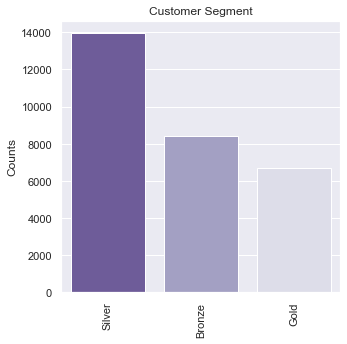

In [58]:

customer_count = rfm['General_Segment'].value_counts().sort_values(ascending=False)
plt.figure(figsize=(5,5))
sns.barplot(customer_count.index, customer_count.values, palette="Purples_r")
plt.ylabel("Counts")
plt.title("Customer Segment");
plt.xticks(rotation=90);

In [59]:
rfm['RFM_Score'].value_counts().sort_values(ascending=False)


8.0     3653
9.0     3505
6.0     3407
7.0     3376
10.0    3217
5.0     3050
4.0     2812
3.0     2540
11.0    2243
12.0    1209
Name: RFM_Score, dtype: int64

In [60]:
rfm

,Recency,Frequency,MonetaryValue,T-Age,R,F,M,RFM_Segment,RFM_Score,General_Segment
Customer_ID,,,,,,,,,,
1000000,7,3,389.1,522,4,2,2,422,8.0,Silver
1000001,62,2,488.8,316,2,1,2,212,5.0,Bronze
1000002,19,3,437.3,42,4,2,2,422,8.0,Silver
1000003,5,6,1264.5,256,4,4,4,444,12.0,Gold
1000005,90,1,100.2,0,2,1,1,211,4.0,Bronze
...,...,...,...,...,...,...,...,...,...,...
1029995,3,4,577.5,435,4,3,2,432,9.0,Silver
1029996,26,4,355.2,381,3,3,2,332,8.0,Silver
1029997,165,2,533.0,10,1,1,2,112,4.0,Bronze


In [93]:
rfm_merged =  rfm.merge(Transaction_Revenue, left_on='Customer_ID', right_on='Customer_ID')

In [62]:
rfm_merged.to_csv('RFM.csv')
!cp RFM.csv '/content/drive/My Drive/ADM/project'

'cp' is not recognized as an internal or external command,
operable program or batch file.


In [63]:
y = rfm_merged['General_Segment']


In [64]:
rfm_merged.head()

,Recency,Frequency,MonetaryValue,T-Age,R,F,M,RFM_Segment,RFM_Score,General_Segment,Transaction,Revenue,avg_order_value,profit_margin,CLV,cust_lifetime_value
Customer_ID,,,,,,,,,,,,,,,,
1000000,7,3,389.1,522,4,2,2,422,8.0,Silver,3,389.1,129.700000,0.15,3568.481475,535.272221
1000001,62,2,488.8,316,2,1,2,212,5.0,Bronze,2,488.8,244.400000,0.10,6724.262703,672.426270
1000002,19,3,437.3,42,4,2,2,422,8.0,Silver,3,437.3,145.766667,0.15,4010.529296,601.579394
1000003,5,6,1264.5,256,4,4,4,444,12.0,Gold,6,1264.5,210.750000,0.30,5798.438481,1739.531544
1000005,90,1,100.2,0,2,1,1,211,4.0,Bronze,1,100.2,100.200000,0.05,2756.837655,137.841883


In [94]:
rfm_merged= rfm_merged.drop(['RFM_Segment','profit_margin','CLV','General_Segment','avg_order_value','Transaction','RFM_Score','R','F','M'],axis=1)


In [95]:
rfm_merged.head()

,Recency,Frequency,MonetaryValue,T-Age,Revenue,cust_lifetime_value
Customer_ID,,,,,,
1000000,7,3,389.1,522,389.1,535.272221
1000001,62,2,488.8,316,488.8,672.426270
1000002,19,3,437.3,42,437.3,601.579394
1000003,5,6,1264.5,256,1264.5,1739.531544
1000005,90,1,100.2,0,100.2,137.841883


In [67]:
rfm_merged = pd.get_dummies(rfm_merged)

In [96]:
rfm_merged.head()

,Recency,Frequency,MonetaryValue,T-Age,Revenue,cust_lifetime_value
Customer_ID,,,,,,
1000000,7,3,389.1,522,389.1,535.272221
1000001,62,2,488.8,316,488.8,672.426270
1000002,19,3,437.3,42,437.3,601.579394
1000003,5,6,1264.5,256,1264.5,1739.531544
1000005,90,1,100.2,0,100.2,137.841883


In [97]:
X = rfm_merged

In [98]:
classes = ['Bronze','Silver','Gold']

In [99]:
import xgboost as xgb
from sklearn.model_selection import KFold, cross_val_score, train_test_split
import xgboost as xgb

In [100]:
from sklearn.datasets import load_iris
from sklearn import svm

# Explainers:
# 1. SHAP Tabular Explainer
from interpret.ext.blackbox import TabularExplainer

# OR

# 2. Mimic Explainer
from interpret.ext.blackbox import MimicExplainer
# You can use one of the following four interpretable models as a global surrogate to the black box model
from interpret.ext.glassbox import LGBMExplainableModel
from interpret.ext.glassbox import LinearExplainableModel
from interpret.ext.glassbox import SGDExplainableModel
from interpret.ext.glassbox import DecisionTreeExplainableModel

# OR

# 3. PFI Explainer
from interpret.ext.blackbox import PFIExplainer

In [101]:
y=y.replace('Gold',2)
y=y.replace('Silver',1)
y=y.replace('Bronze',0)
y

Customer_ID
1000000    1
1000001    0
1000002    1
1000003    2
1000005    0
          ..
1029995    1
1029996    1
1029997    0
1029998    2
1029999    0
Name: General_Segment, Length: 29012, dtype: int64

In [102]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05, random_state=56)

In [103]:
clf = svm.SVC(gamma=0.001, C=100., probability=True)
model = clf.fit(X_train, y_train)

In [104]:
print('Accuracy of SVM classifier on training set: {:.2f}'
       .format(model.score(X_train, y_train)))
print('Accuracy of SVM classifier on test set: {:.2f}'
       .format(model.score(X_test[X_train.columns], y_test)))

Accuracy of SVM classifier on training set: 0.99
Accuracy of SVM classifier on test set: 0.87


In [107]:
X_train.columns
featu_na = ['Recency','Frequency','MonetaryValue','T-Age','Revenue','cust_lifetime_value']

In [108]:
explainer = TabularExplainer(model, 
                             X_train, 
                             features=featu_na, 
                             classes=classes)


Setting feature_perturbation = "tree_path_dependent" because no background data was given.
The option feature_dependence has been renamed to feature_perturbation!
The option feature_perturbation="independent" is has been renamed to feature_perturbation="interventional"!


In [109]:
X_t, X_tests, y_train, y_tests = train_test_split(X_test, y_test, test_size=0.02, random_state=56)

In [110]:
global_explanation = explainer.explain_global(X_tests)


l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!
l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_

l1_reg="auto" is deprecated and in the next version (v0.29) the behavior will change from a conditional use of AIC to simply "num_features(10)"!


In [111]:
# Sorted SHAP values
print('ranked global importance values: {}'.format(global_explanation.get_ranked_global_values()))
# Corresponding feature names
print('ranked global importance names: {}'.format(global_explanation.get_ranked_global_names()))
# Feature ranks (based on original order of features)
print('global importance rank: {}'.format(global_explanation.global_importance_rank))

# Note: Do not run this cell if using PFIExplainer, it does not support per class explanations
# Per class feature names
print('ranked per class feature names: {}'.format(global_explanation.get_ranked_per_class_names()))
# Per class feature importance values
print('ranked per class feature values: {}'.format(global_explanation.get_ranked_per_class_values()))

ranked global importance values: [0.08166139767013247, 0.0707683414295393, 0.0700464256306052, 0.07004642563060517, 0.03601287647244745, 0.01641769961098298]
ranked global importance names: ['Recency', 'cust_lifetime_value', 'MonetaryValue', 'Revenue', 'T-Age', 'Frequency']
global importance rank: [0, 5, 2, 4, 3, 1]
ranked per class feature names: [['Recency', 'cust_lifetime_value', 'MonetaryValue', 'Revenue', 'T-Age', 'Frequency'], ['Recency', 'cust_lifetime_value', 'MonetaryValue', 'Revenue', 'T-Age', 'Frequency'], ['Recency', 'cust_lifetime_value', 'MonetaryValue', 'Revenue', 'T-Age', 'Frequency']]
ranked per class feature values: [[0.0809142197742736, 0.07000849229970106, 0.06948832003315558, 0.06948832003315555, 0.03384331538229528, 0.012711680392788565], [0.0849500631489338, 0.08047028888965328, 0.07909827731955958, 0.07909827731955955, 0.04461804325665592, 0.018708747291444013], [0.07911991008719003, 0.06182624309926356, 0.06155267953910044, 0.06155267953910041, 0.02957727077839

In [112]:
# Print out a dictionary that holds the sorted feature importance names and values
print('global importance rank: {}'.format(global_explanation.get_feature_importance_dict()))

global importance rank: {'Recency': 0.08166139767013247, 'cust_lifetime_value': 0.0707683414295393, 'MonetaryValue': 0.0700464256306052, 'Revenue': 0.07004642563060517, 'T-Age': 0.03601287647244745, 'Frequency': 0.01641769961098298}


In [113]:

# feature shap values for all features and all data points in the training data
print('local importance values: {}'.format(global_explanation.local_importance_values))

local importance values: [[[-0.0841848764624363, -0.012186214384920083, -0.048326679951468, -0.023475746470137004, -0.04832667995146797, -0.04832685395474598], [-0.03667555213135098, -0.01147578206771356, -0.02631240330094836, -0.03964270364612532, -0.02631240330094893, -0.024300531796408897], [0.11058586575677716, 0.009016564787666694, -0.08723222217303246, -0.07265534254678899, -0.08723222217303242, -0.09679714460517597], [-0.09059649876745697, -0.004952917915040961, -0.046543619852395024, -0.004130984244770514, -0.04654361985239505, -0.045011065326441], [-0.066287694613225, -0.007998307436416385, -0.05086170552357325, 0.023366572563736435, -0.05086170552357315, -0.05122674452726064], [-0.0076085700006724155, -0.03891551138092507, -0.07418435721783215, -0.012121465417818292, -0.07418435721783209, -0.07464138670785161], [0.018606840063153246, 0.01958508941019843, 0.1783675533946894, 0.030757118793962424, 0.17836755339468932, 0.18771798927447064], [-0.07557966139428138, -0.000744128555

In [114]:
from interpret_community.widget import ExplanationDashboard

In [115]:
ExplanationDashboard(global_explanation, model, datasetX=X_tests)